In [ ]:
#Support Vector Machine is a discriminative classifier which finds the optimal hyperplane that distinctly classifies the data 
#points in an N-dimensional space(N - the number of features). In a two dimensional space, a hyperplane is a line that optimally
#divides the data points into two different classes

### Suport Vector Machine on iris_data

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

C:\Users\avinash\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\avinash\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
iris = load_iris()

In [3]:
dir(iris)      # feature of iris dataset

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.DataFrame(iris.data,columns=['SL','SW','PL','PW'])
df['target']=iris.target
x = df.loc[:,['SL','PL']]
y = df.loc[:,['SW','PW']]


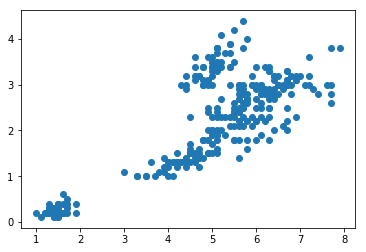

In [6]:
plt.scatter(x,y)

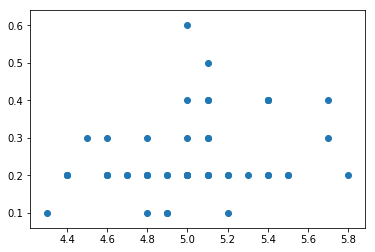

In [7]:
newdf = df[df['target']==0][['SL','PW']]
x = newdf['SL']
y = newdf['PW']
plt.scatter(x,y)

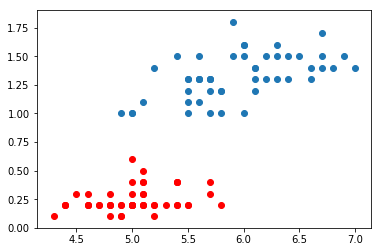

In [8]:
newdf1 = df[df['target']==1][['SL','PW']]
x1 = newdf1['SL']
y1 = newdf1['PW']
plt.scatter(x1,y1)
plt.scatter(x,y,color='r')


In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
df1 = df[df['target']==0]
df2 = df[df['target']==1]
df3 = df[df['target']==2] 


Text(0, 0.5, 'sepal width (cm)')

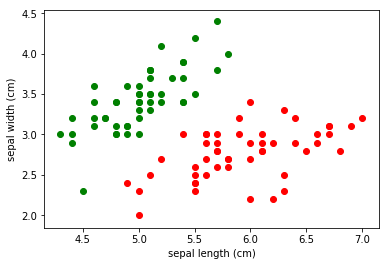

In [19]:
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

In [20]:
X = df.iloc[:,:-1]
Y = df.iloc[:,4]


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33)

In [22]:
# Apply the classifire
from sklearn.svm import SVC

In [23]:
model = SVC()
model.fit(x_train,y_train)

C:\Users\avinash\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
model.score(x_train,y_train)*100

98.0

In [25]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 0,
       2, 2, 0, 1, 0, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 0])

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[19,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 14]], dtype=int64)